# OPTICS algorithm from scratch

In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [452]:
X,y = make_blobs(n_samples=500,n_features=2,centers=2,random_state=19)  ### X is the data and y are cluster labels. 

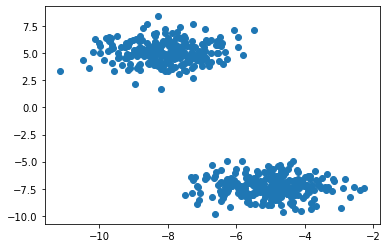

In [453]:
plt.scatter(X[:,0],X[:,1])

In [454]:
d = {}
d['Points']=list(X)
d['Cluster']=np.zeros(X.shape[0],dtype=int)
d['Reachability Distance']=[10000]*X.shape[0]
d['Core Distance']         = [10000]*X.shape[0]
df = pd.DataFrame(d)

In [455]:
df.head()

,Points,Cluster,Reachability Distance,Core Distance
0,"[-4.5909383873448295, -6.043818587917302]",0,10000,10000
1,"[-4.883593256800025, -8.496874685265519]",0,10000,10000
2,"[-8.035884035174696, 4.210129616672425]",0,10000,10000
3,"[-8.924876431092317, 6.281052315876352]",0,10000,10000
4,"[-7.635452157309633, 6.406502874004334]",0,10000,10000


### Set the parameters here

In [456]:
eps=5
min_pt=3

### Find the Neighbours of a point

In [457]:
def find_neighbors(p):
    '''Return the indices of Neighbourhood points '''
    n_points = [] #index and distance of the neighborhood point
    q=df['Points'][df.index!=p] #points except pth point
    for i,j in zip(q.index,q):
        d=np.linalg.norm(X[p]-j)
        if(d<eps):
            n_points.append((i,d))
    return n_points

### To update cluster of the point

In [458]:
def update_poit(p,cluster):
    df.iloc[p,1] = cluster

### Update the Core and Reachability Distance

In [459]:
def core_reach_dist(p,n_points,cluster):
    '''Update the core and rechability distance'''
    n_points.sort(key = lambda x:x[1]) #sort based on the distance in ascending order
    df.iloc[p,3]=n_points[min_pt-1][1] #updating the core distance
    update_poit(p,cluster)
    for j in n_points:
        r = max(j[1],n_points[min_pt-1][1]) #reachability distance
        if(r<df.iloc[j[0],2]): #if new reachability distance is smaller than old rechability distance
            df.iloc[j[0],2] = r #update reachability distance
    for j in n_points:
        if(check_processed(j[0])==False):
            n_points_neigh=find_neighbors(j[0])
            n_points_neigh.sort(key = lambda x:x[1]) #sort based on the distance in ascending order
            df.iloc[j[0],3]=n_points_neigh[min_pt-1][1] #updating the core distance
            update_poit(j[0],cluster)
            for k in n_points_neigh:
                r = max(k[1],n_points_neigh[min_pt-1][1]) #reachability distance
                if(r<df.iloc[k[0],2]): #if new reachability distance is smaller than old rechability distance
                    df.iloc[k[0],2] = r #update reachability distance

### Check if a point is processed or not

In [460]:
def check_processed(p):
    if df['Cluster'][p]==0:
        return False
    return True

## Final Calculation

In [461]:
cluster=1
for i in df.index:
    if check_processed(i)==False:
        n_points_d = find_neighbors(i)
        core_reach_dist(i,n_points_d,cluster)
        cluster=cluster+1

## Final Result

In [462]:
df

,Points,Cluster,Reachability Distance,Core Distance
0,"[-4.5909383873448295, -6.043818587917302]",1,0.222520,0.238701
1,"[-4.883593256800025, -8.496874685265519]",1,0.083426,0.115171
2,"[-8.035884035174696, 4.210129616672425]",2,0.208016,0.208016
3,"[-8.924876431092317, 6.281052315876352]",2,0.211481,0.204392
4,"[-7.635452157309633, 6.406502874004334]",2,0.113506,0.127351
...,...,...,...,...
495,"[-8.229598203456067, 5.412596800506085]",2,0.096875,0.094795
496,"[-5.949860517880562, 6.4963672455556125]",2,0.541165,0.706239
497,"[-5.688828216380491, -8.711592860096452]",1,0.300780,0.300780
498,"[-6.098031889314591, -6.796567130091841]",1,0.179646,0.190450


## Plot of the points after clustering

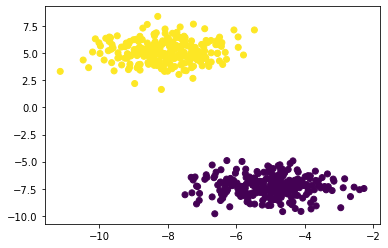

In [464]:
plt.scatter(X[:,0],X[:,1],c=df['Cluster'])